In [3]:
import tensorflow as tf
from tensorflow import keras

#load Minist dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation='softmax'), #output layer
    
])

c:\Users\lenovo\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model training
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8794 - loss: 0.4338
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9666 - loss: 0.1171
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9767 - loss: 0.0782
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9825 - loss: 0.0570
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9865 - loss: 0.0441


In [7]:
#model evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9746 - loss: 0.0877

Test accuracy: 0.9782000184059143


In [8]:
import numpy as np
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted digit: 9


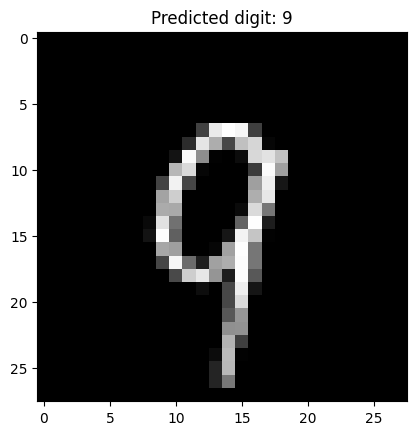

In [20]:
#randomly select an image from the test set
image_index = np.random.randint(0, x_test.shape[0])
test_image = x_test[image_index]

#model prediction
pred = model.predict(test_image.reshape(1, 28, 28))

#predict digit
predicted_digit = np.argmax(pred)
print(f'Predicted digit: {predicted_digit}')

#image showing
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted digit: {predicted_digit}')
plt.show()